# Sine Wave Forecasting

## Importing the libraries

In [1]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Creating and Visualising the dataset

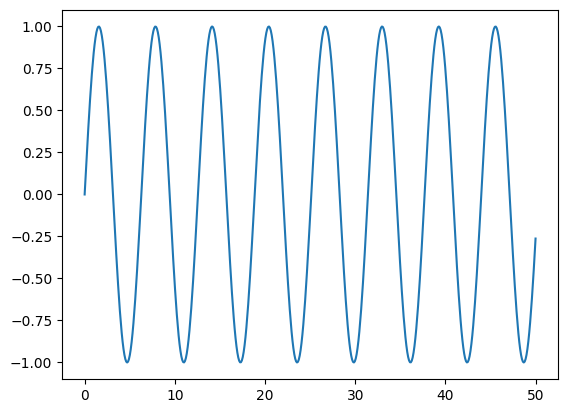

In [2]:
x = np.linspace(0, 50, 500)
y = np.sin(x)

plt.plot(x, y)

In [3]:
df = pd.DataFrame(data = y, index = x, columns = ['Sine'])
df

,Sine
0.000000,0.000000
0.100200,0.100033
0.200401,0.199062
0.300601,0.296095
0.400802,0.390157
...,...
49.599198,-0.618069
49.699399,-0.536331
49.799599,-0.449212
49.899800,-0.357587


## Train-Test Split

In [4]:
test_percent = 0.1
len(df)*test_percent

50.0

In [5]:
test_point = np.round(len(df)*test_percent)
test_point

50.0

In [6]:
test_ind = int(len(df) - test_point)
test_ind

450

In [7]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [8]:
train

,Sine
0.000000,0.000000
0.100200,0.100033
0.200401,0.199062
0.300601,0.296095
0.400802,0.390157
...,...
44.589178,0.570308
44.689379,0.649618
44.789579,0.722410
44.889780,0.787956


In [9]:
test

,Sine
45.090180,0.894755
45.190381,0.934938
45.290581,0.965741
45.390782,0.986856
45.490982,0.998072
45.591182,0.999275
45.691383,0.990453
45.791583,0.971696
45.891784,0.943191
45.991984,0.905224


In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(train)

MinMaxScaler()

In [12]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Timeseries Generation

In [13]:
length = 50 ## This particular length was chosen as it is capable of showing one complete cycle when plotted.
batch_size = 1

generator = TimeseriesGenerator(data = scaled_train, targets = scaled_train, length = length, batch_size = batch_size)
x, y = generator[0]

print("The data given is " + str(x))
print()
print("The target value is " + str(y))

The data given is [[[0.50000825]
  [0.5500257 ]
  [0.59954139]
  [0.6480586 ]
  [0.6950906 ]
  [0.74016559]
  [0.78283139]
  [0.82265998]
  [0.85925183]
  [0.89223984]
  [0.92129309]
  [0.94612013]
  [0.9664719 ]
  [0.98214423]
  [0.99297991]
  [0.99887024]
  [0.99975612]
  [0.99562866]
  [0.98652928]
  [0.97254926]
  [0.95382884]
  [0.93055581]
  [0.90296365]
  [0.87132916]
  [0.83596967]
  [0.79723991]
  [0.75552841]
  [0.7112536 ]
  [0.66485964]
  [0.61681193]
  [0.56759248]
  [0.51769504]
  [0.46762018]
  [0.41787022]
  [0.36894425]
  [0.32133307]
  [0.27551432]
  [0.23194763]
  [0.19107004]
  [0.15329164]
  [0.11899141]
  [0.08851343]
  [0.06216345]
  [0.04020581]
  [0.02286078]
  [0.01030236]
  [0.00265653]
  [0.        ]
  [0.00235941]
  [0.0097111 ]]]

The target value is [[0.02198132]]


## Model Creation

In [14]:
n_features = 1    # Denotes the number of features

In [15]:
model = Sequential()

model.add(SimpleRNN(50, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit_generator(generator, epochs = 5)

Epoch 1/5


<ipython-input-17-a0bbf95fa02a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 5)


400/400 [==============================] - 8s 16ms/step - loss: 0.0158
Epoch 2/5
400/400 [==============================] - 8s 20ms/step - loss: 0.0057
Epoch 3/5
400/400 [==============================] - 10s 25ms/step - loss: 5.0672e-04
Epoch 4/5
400/400 [==============================] - 8s 20ms/step - loss: 8.4678e-05
Epoch 5/5
400/400 [==============================] - 4s 11ms/step - loss: 5.7119e-05


<Axes: >

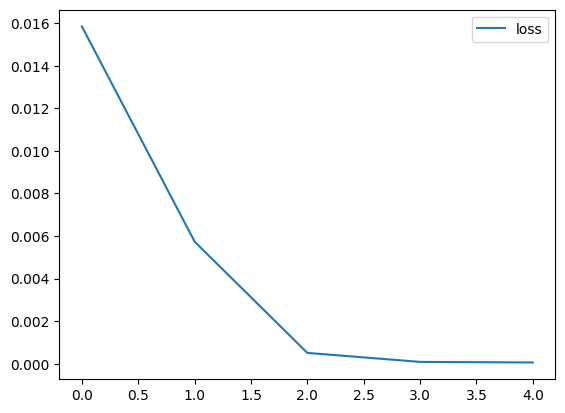

In [18]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [19]:
first_eval_batch = scaled_train[-length:]
first_eval_batch = first_eval_batch.reshape((1, length))
print(model.predict(first_eval_batch))

1/1 [==============================] - 0s 199ms/step
[[0.9528259]]


In [20]:
scaled_test[0]

array([0.94739531])

In [21]:
test_predictions = []


first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:, 1:], [current_pred], axis=1)

1/1 [==============================] - 0s 23ms/step


In [22]:
test_predictions

[array([0.9528259], dtype=float32),
 array([0.97109413], dtype=float32),
 array([0.98823726], dtype=float32),
 array([0.9973039], dtype=float32),
 array([1.0024515], dtype=float32),
 array([1.0030756], dtype=float32),
 array([0.99962574], dtype=float32),
 array([0.9903599], dtype=float32),
 array([0.9780209], dtype=float32),
 array([0.9584063], dtype=float32),
 array([0.93730056], dtype=float32),
 array([0.9100653], dtype=float32),
 array([0.88015085], dtype=float32),
 array([0.8462354], dtype=float32),
 array([0.80929464], dtype=float32),
 array([0.76878834], dtype=float32),
 array([0.7260778], dtype=float32),
 array([0.6802726], dtype=float32),
 array([0.63376766], dtype=float32),
 array([0.584197], dtype=float32),
 array([0.5339418], dtype=float32),
 array([0.48307574], dtype=float32),
 array([0.43103138], dtype=float32),
 array([0.37993973], dtype=float32),
 array([0.32893386], dtype=float32),
 array([0.2794806], dtype=float32),
 array([0.23191442], dtype=float32),
 array([0.186556

In [23]:
scaled_test

array([[ 9.47395314e-01],
       [ 9.67486902e-01],
       [ 9.82888874e-01],
       [ 9.93446722e-01],
       [ 9.99054531e-01],
       [ 9.99656047e-01],
       [ 9.95245234e-01],
       [ 9.85866341e-01],
       [ 9.71613455e-01],
       [ 9.52629556e-01],
       [ 9.29105085e-01],
       [ 9.01276034e-01],
       [ 8.69421575e-01],
       [ 8.33861265e-01],
       [ 7.94951833e-01],
       [ 7.53083610e-01],
       [ 7.08676604e-01],
       [ 6.62176295e-01],
       [ 6.14049162e-01],
       [ 5.64778001e-01],
       [ 5.14857089e-01],
       [ 4.64787216e-01],
       [ 4.15070672e-01],
       [ 3.66206198e-01],
       [ 3.18683988e-01],
       [ 2.72980774e-01],
       [ 2.29555036e-01],
       [ 1.88842410e-01],
       [ 1.51251313e-01],
       [ 1.17158850e-01],
       [ 8.69070248e-02],
       [ 6.07993170e-02],
       [ 3.90976314e-02],
       [ 2.20196733e-02],
       [ 9.73676418e-03],
       [ 2.37212264e-03],
       [-3.71235880e-07],
       [ 2.64308275e-03],
       [ 1.0

In [24]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[ 0.90561638],
       [ 0.94215207],
       [ 0.97643761],
       [ 0.99457052],
       [ 1.00486557],
       [ 1.00611367],
       [ 0.9992141 ],
       [ 0.98068281],
       [ 0.95600533],
       [ 0.916777  ],
       [ 0.87456635],
       [ 0.82009695],
       [ 0.76026932],
       [ 0.69243982],
       [ 0.61855985],
       [ 0.53754894],
       [ 0.45212964],
       [ 0.36052113],
       [ 0.26751324],
       [ 0.16837395],
       [ 0.0678657 ],
       [-0.03386431],
       [-0.13795086],
       [-0.24013201],
       [-0.34214161],
       [-0.44104606],
       [-0.53617645],
       [-0.62689134],
       [-0.71129902],
       [-0.78842352],
       [-0.85884847],
       [-0.91949854],
       [-0.97186122],
       [-1.01403417],
       [-1.04649029],
       [-1.06853648],
       [-1.08032472],
       [-1.08150142],
       [-1.07277365],
       [-1.05340659],
       [-1.02473412],
       [-0.98625484],
       [-0.93895497],
       [-0.88307554],
       [-0.81895186],
       [-0

In [25]:
test['Predictions'] = true_predictions
test

<ipython-input-25-bf6ac9853582>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


,Sine,Predictions
45.090180,0.894755,0.905616
45.190381,0.934938,0.942152
45.290581,0.965741,0.976438
45.390782,0.986856,0.994571
45.490982,0.998072,1.004866
45.591182,0.999275,1.006114
45.691383,0.990453,0.999214
45.791583,0.971696,0.980683
45.891784,0.943191,0.956005
45.991984,0.905224,0.916777


<Axes: >

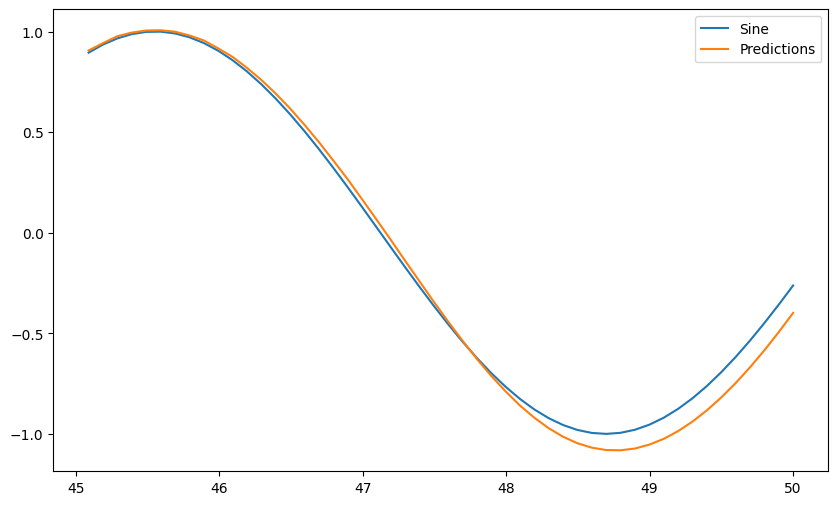

In [26]:
test.plot(figsize = (10, 6))

## Creating and comparing a LSTM model to a Simple RNN

In [27]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [28]:
length = 49
generator = TimeseriesGenerator(scaled_train, scaled_train, length = length, batch_size = batch_size)

validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length = length, batch_size = batch_size)

In [29]:
model = Sequential()

model.add(LSTM(50, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit_generator(generator, epochs = 20, validation_data = validation_generator, callbacks = [early_stop])

Epoch 1/20


<ipython-input-30-a238e08cf2be>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs = 20, validation_data = validation_generator, callbacks = [early_stop])


401/401 [==============================] - 10s 19ms/step - loss: 0.0225 - val_loss: 1.4493e-04
Epoch 2/20
401/401 [==============================] - 7s 18ms/step - loss: 2.0643e-04 - val_loss: 2.3451e-05
Epoch 3/20
401/401 [==============================] - 6s 16ms/step - loss: 7.2050e-05 - val_loss: 5.3575e-06
Epoch 4/20
401/401 [==============================] - 7s 17ms/step - loss: 9.8474e-04 - val_loss: 3.5003e-07
Epoch 5/20
401/401 [==============================] - 8s 20ms/step - loss: 6.3220e-05 - val_loss: 4.6163e-05
Epoch 6/20
401/401 [==============================] - 7s 17ms/step - loss: 5.6014e-05 - val_loss: 1.6731e-05


In [31]:
test_predictions = []


first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:, 1:], [current_pred], axis=1)

1/1 [==============================] - 0s 23ms/step


<ipython-input-32-8ad040576069>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions_LSTM'] = true_predictions


<Axes: >

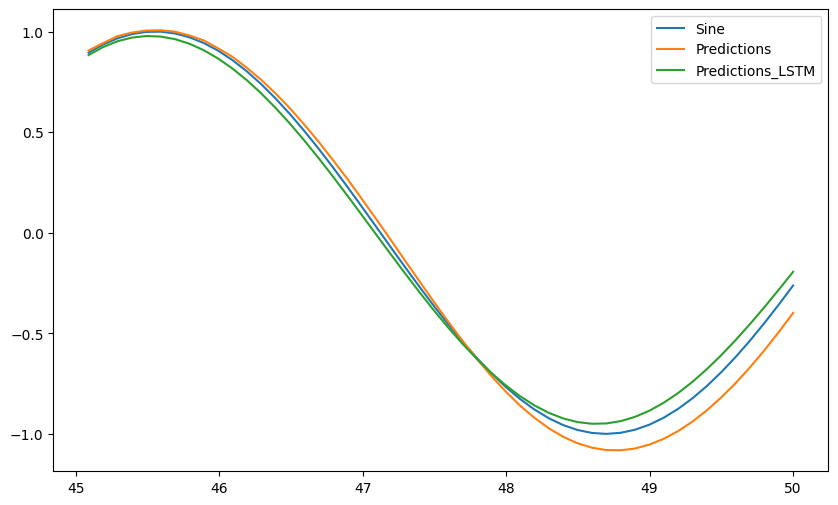

In [32]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions_LSTM'] = true_predictions
test.plot(figsize = (10, 6))

<Axes: >

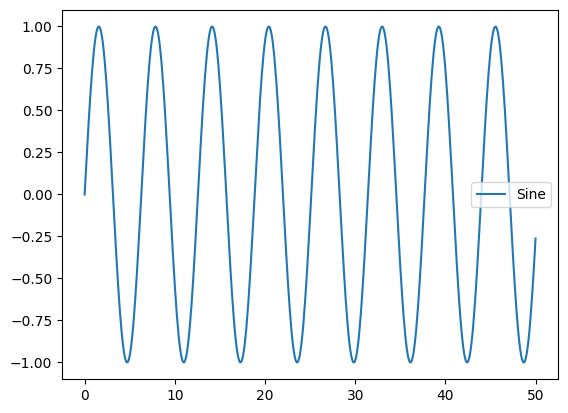

In [33]:
df.plot()

## Forecasting on the entire dataset

In [34]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [35]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [36]:
model = Sequential()

model.add(LSTM(50, input_shape = (length, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.fit(generator, epochs = 6)

Epoch 1/6
451/451 [==============================] - 11s 18ms/step - loss: 0.0111
Epoch 2/6
451/451 [==============================] - 7s 16ms/step - loss: 1.3271e-04
Epoch 3/6
451/451 [==============================] - 8s 18ms/step - loss: 2.3973e-04
Epoch 4/6
451/451 [==============================] - 8s 18ms/step - loss: 3.5664e-05
Epoch 5/6
451/451 [==============================] - 8s 18ms/step - loss: 9.8646e-05
Epoch 6/6
451/451 [==============================] - 12s 27ms/step - loss: 1.4975e-04


In [38]:
forecast = []


first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length))

for i in range(50):
  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:, 1:], [current_pred], axis=1)

1/1 [==============================] - 0s 40ms/step


In [39]:
forecast = scaler.inverse_transform(forecast)

In [40]:
forecast_index = np.arange(50.1, 55.1, step = 0.1)
print(len(forecast))
print(len(forecast_index))

50
50


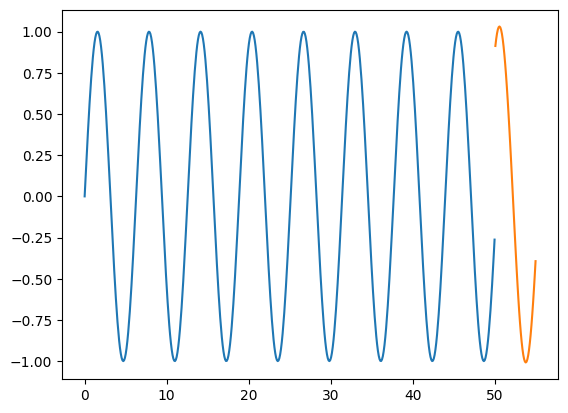

In [41]:
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)